**Module # 1**

# Create a private GitHub repository Named, Francesko_Mbistrova_DA201_Assignment
# Set up the repository for the project files
# Demonstrated the GitHub setup by loading and pushing updates for all the files

**Module # 2**

In [53]:
import pandas as pd

# Import the data files
actual_duration_df = pd.read_csv('actual_duration.csv')
appointments_regional_df = pd.read_csv('appointments_regional.csv')
national_categories_df = pd.read_excel('national_categories.xlsx')
tweets_df = pd.read_csv('tweets.csv')

# Check column names
print("Column names for actual_duration_df:")
print(actual_duration_df.columns)
print()

print("Column names for appointments_regional_df:")
print(appointments_regional_df.columns)
print()

print("Column names for national_categories_df:")
print(national_categories_df.columns)
print()

print("Column names for tweets_df:")
print(tweets_df.columns)
print()

# Check data types
print("Data types for actual_duration_df:")
print(actual_duration_df.dtypes)
print()

print("Data types for appointments_regional_df:")
print(appointments_regional_df.dtypes)
print()

print("Data types for national_categories_df:")
print(national_categories_df.dtypes)
print()

print("Data types for tweets_df:")
print(tweets_df.dtypes)
print()

# Check for missing values
print("Missing values in actual_duration_df:")
print(actual_duration_df.isnull().sum())
print()

print("Missing values in appointments_regional_df:")
print(appointments_regional_df.isnull().sum())
print()

print("Missing values in national_categories_df:")
print(national_categories_df.isnull().sum())
print()

print("Missing values in tweets_df:")
print(tweets_df.isnull().sum())
print()

# Get descriptive statistics
print("Descriptive statistics for actual_duration_df:")
print(actual_duration_df.describe())
print()

print("Descriptive statistics for appointments_regional_df:")
print(appointments_regional_df.describe())
print()

print("Descriptive statistics for national_categories_df:")
print(national_categories_df.describe())
print()

print("Descriptive statistics for tweets_df:")
print(tweets_df.describe())
print()

# Explore sample data
print("Sample data for actual_duration_df:")
print(actual_duration_df.head())
print()

print("Sample data for appointments_regional_df:")
print(appointments_regional_df.head())
print()

print("Sample data for national_categories_df:")
print(national_categories_df.head())
print()

print("Sample data for tweets_df:")
print(tweets_df.head())


Column names for actual_duration_df:
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')

Column names for appointments_regional_df:
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')

Column names for national_categories_df:
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')

Column names for tweets_df:
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],


**Module # 3**

In [55]:
# Number of locations, service settings, context types, national categories, and appointment statuses
num_locations = len(actual_duration_df['sub_icb_location_name'].unique())
num_service_settings = len(national_categories_df['service_setting'].unique())
num_context_types = len(national_categories_df['context_type'].unique())
num_national_categories = len(national_categories_df['national_category'].unique())
num_appointment_statuses = len(appointments_regional_df['appointment_status'].unique())

print("Number of Locations:", num_locations)
print("Number of Service Settings:", num_service_settings)
print("Number of Context Types:", num_context_types)
print("Number of National Categories:", num_national_categories)
print("Number of Appointment Statuses:", num_appointment_statuses)

# Date range and service settings with the most appointments
appointments_regional_df['appointment_month'] = pd.to_datetime(appointments_regional_df['appointment_month'])
min_date = appointments_regional_df['appointment_month'].min()
max_date = appointments_regional_df['appointment_month'].max()

print("Date Range: {} to {}".format(min_date, max_date))

service_settings_appointments = national_categories_df.groupby('service_setting')['count_of_appointments'].sum()
service_settings_appointments = service_settings_appointments.sort_values(ascending=False)

print("Service Settings with Most Appointments:")
print(service_settings_appointments.head())

# Numappointments_regionalber of appointments and records per month
appointments_regional_df['appointment_month'] = appointments_regional_df['appointment_month'].dt.month
appointments_per_month = appointments_regional_df.groupby('appointment_month')['count_of_appointments'].sum()
records_per_month = appointments_regional_df.groupby('appointment_month').size()

print("Appointments per Month:")
print(appointments_per_month)

print("Records per Month:")
print(records_per_month)

# Top trending hashtags on Twitter related to healthcare in the UK
tweets_df['tweet_entities_hashtags'] = tweets_df['tweet_entities_hashtags'].astype(str)
tweets_df['tweet_entities_hashtags'] = tweets_df['tweet_entities_hashtags'].apply(lambda x: x.lower())
top_trending_hashtags = tweets_df['tweet_entities_hashtags'].value_counts().head(10)

print("Top Trending Hashtags:")
print(top_trending_hashtags)




Number of Locations: 106
Number of Service Settings: 5
Number of Context Types: 3
Number of National Categories: 18
Number of Appointment Statuses: 3
Date Range: 2020-01-01 00:00:00 to 2022-06-01 00:00:00
Service Settings with Most Appointments:
service_setting
General Practice             270811691
Unmapped                      11080810
Primary Care Network           6557386
Other                          5420076
Extended Access Provision      2176807
Name: count_of_appointments, dtype: int64
Appointments per Month:
appointment_month
1     75326839
2     71859450
3     80873930
4     63800873
5     67421115
6     73303065
7     48230656
8     44002691
9     55236756
10    58605766
11    55466672
12    48676712
Name: count_of_appointments, dtype: int64
Records per Month:
appointment_month
1     60433
2     59771
3     61251
4     58649
5     57998
6     58889
7     39401
8     39033
9     40484
10    40684
11    40441
12    39787
dtype: int64
Top Trending Hashtags:
nan                 

**Module # 4**

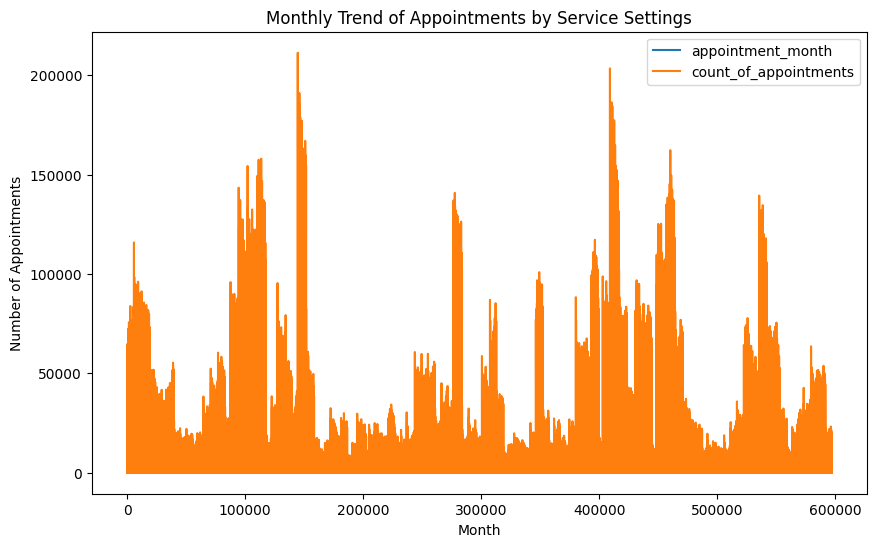

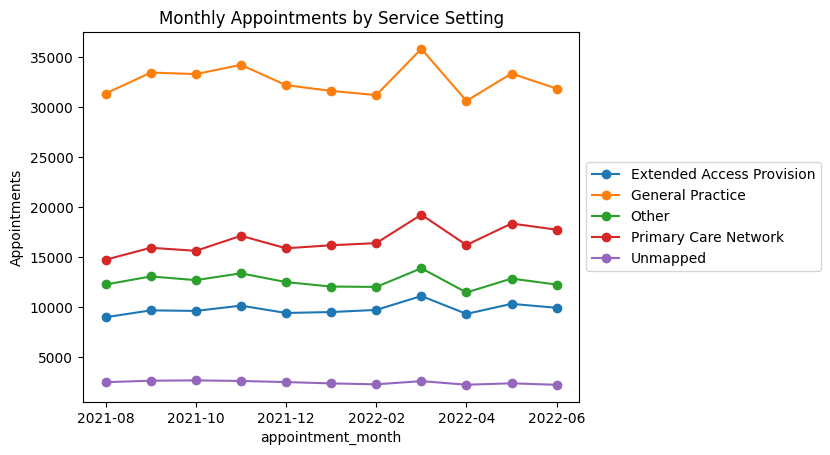

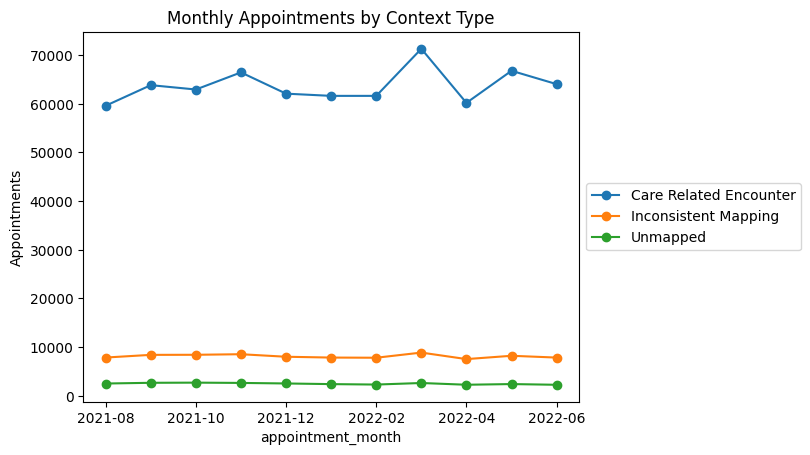

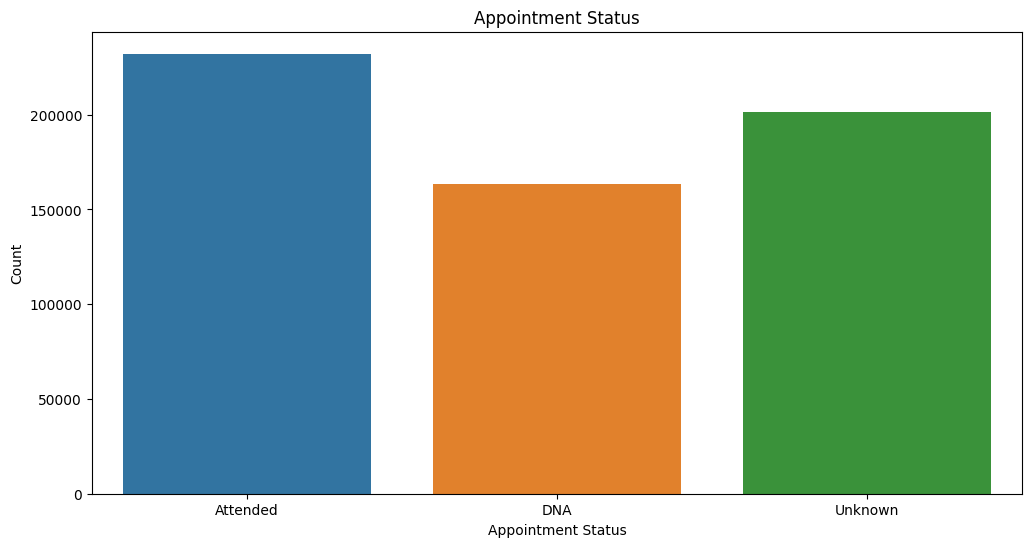

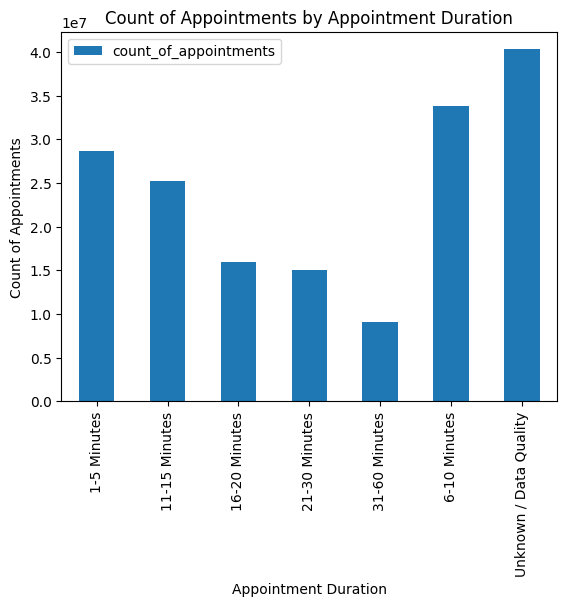

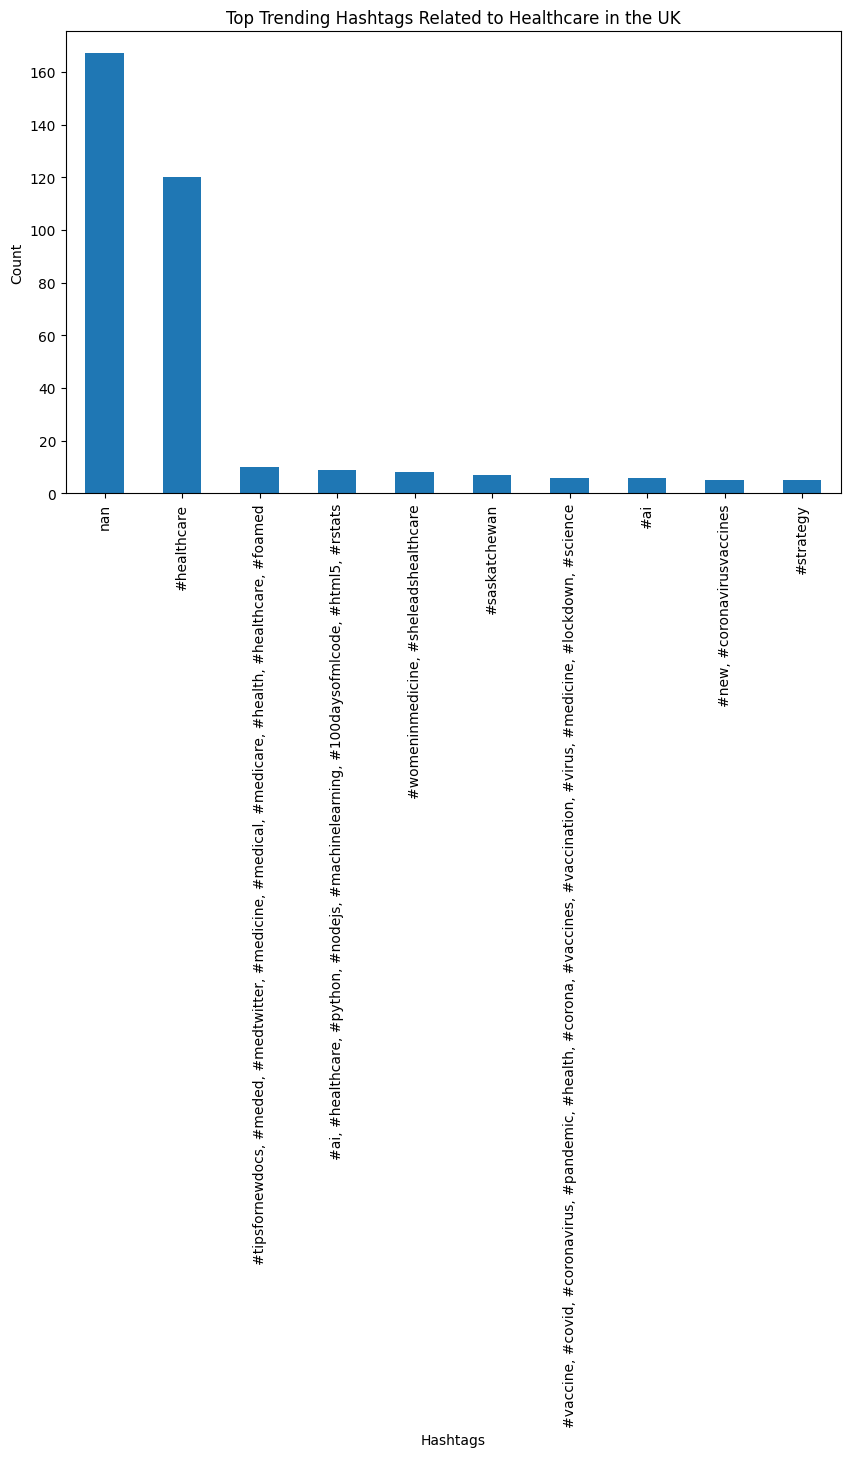

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Monthly trend of appointments
appointments_regional_df.plot(kind='line', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.title('Monthly Trend of Appointments by Service Settings')
plt.show()



# Seasonal Trends - Number of Appointments by Service Setting
monthly_appointments_by_service_setting = national_categories_df.groupby(['appointment_month', 'service_setting']).size().unstack()
monthly_appointments_by_service_setting.plot(kind='line', marker='o')
plt.xlabel('appointment_month')
plt.ylabel('Appointments')
plt.title('Monthly Appointments by Service Setting')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Appointment Types - Pie Chart
monthly_appointments_by_context_type = national_categories_df.groupby(['appointment_month', 'context_type']).size().unstack()
monthly_appointments_by_context_type.plot(kind='line', marker='o')
plt.xlabel('appointment_month')
plt.ylabel('Appointments')
plt.title('Monthly Appointments by Context Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




# Appointment Status - Countplot
plt.figure(figsize=(12, 6))
plt.title("Appointment Status")
sns.countplot(data=appointments_regional_df, x='appointment_status')
plt.xlabel("Appointment Status")
plt.ylabel("Count")
plt.show()

# Extracting necessary columns from actual_duration_df
appointment_duration_counts = actual_duration_df[['actual_duration', 'count_of_appointments']]

# Grouping data by appointment duration and calculating count
appointment_duration_counts = appointment_duration_counts.groupby('actual_duration').sum()

# Plotting the count of appointments by appointment duration
appointment_duration_counts.plot(kind='bar')
plt.xlabel('Appointment Duration')
plt.ylabel('Count of Appointments')
plt.title('Count of Appointments by Appointment Duration')
plt.show()

top_trending_hashtags.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top Trending Hashtags Related to Healthcare in the UK')
plt.show()


**Module # 5**

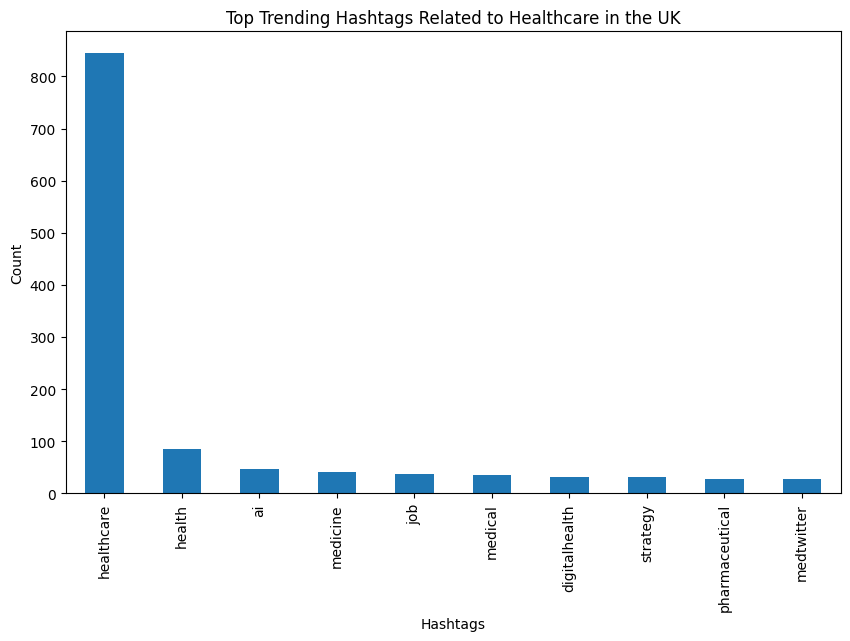

0       As Arkansas’ first Comprehensive Stroke Certif...
1       RT @AndreaGrammer: Work-life balance is at the...
2       RT @OntarioGreens: $10 billion can go a long w...
3       RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...
4       ICYMI: Our recent blogs on Cybersecurity in Ac...
                              ...                        
1169    RT @PotomacPhotonic: Potomac #Innovation Repor...
1170    Not a cent towards workers who would like to a...
1171    The @hfmaorg Region 9 presents "The Value of E...
1172    Happy physiotherapy 🩺 day 🎉..\n#bpt #physiothe...
1173    RT @KimcoStaffing: Apply now to work for #Medi...
Name: tweet_full_text, Length: 1174, dtype: object


In [57]:
# Extract hashtags from tweet_entities_hashtags column
hashtags = tweets_df['tweet_entities_hashtags'].str.extractall(r"#(\w+)")
hashtags = hashtags[0].value_counts().head(10)

# Plot the top trending hashtags
plt.figure(figsize=(10, 6))
hashtags.plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top Trending Hashtags Related to Healthcare in the UK')
plt.show()

# Display the contents of the messages
tweet_full_text = tweets_df['tweet_full_text']
print(tweet_full_text)

**Module # 6**

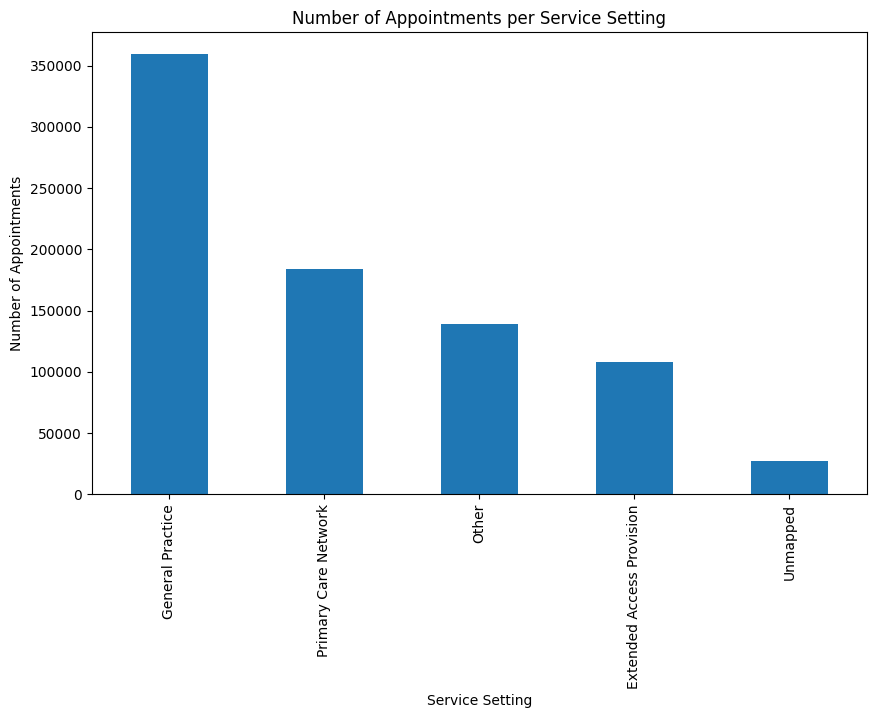

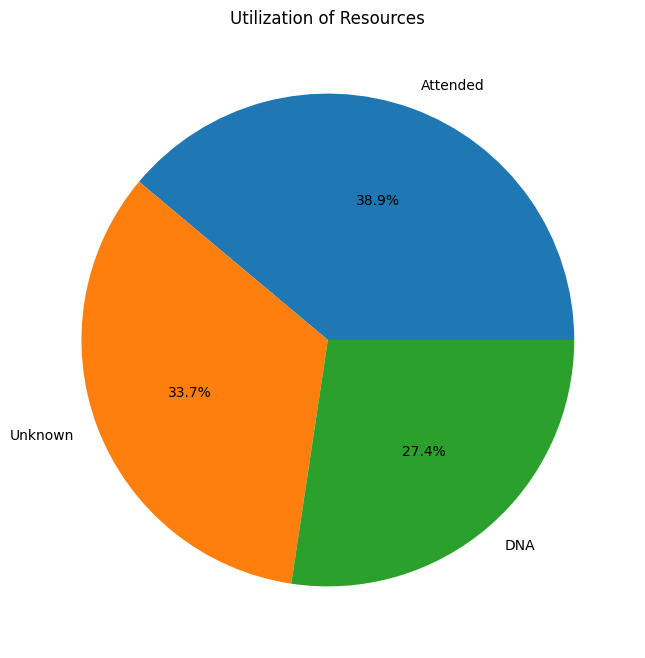

In [58]:
# Additional Data Analysis and Visualization

# Has there been adequate staff and capacity in the networks?
# Analyzing the number of appointments per service setting
appointments_per_service_setting = national_categories_df['service_setting'].value_counts()
appointments_per_service_setting.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.title('Number of Appointments per Service Setting')
plt.show()

# What was the actual utilization of resources?
# Analyzing the utilization of resources based on appointment status
utilization_of_resources = appointments_regional_df['appointment_status'].value_counts()
utilization_of_resources.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Utilization of Resources')
plt.ylabel('')
plt.show()

# Recommendations for the NHS
# Based on the analysis, here are some recommendations:

# 1. Increase staff and capacity in service settings with high demand to ensure timely appointments and reduce waiting times.
# 2. Improve resource utilization by addressing the factors contributing to appointment cancellations and no-shows.
# 3. Monitor and analyze monthly and seasonal trends to better plan staffing and resource allocation.
# 4. Collaborate with relevant stakeholders to identify and address any systemic issues affecting service delivery.

# Obstacles faced and how they were overcome
# - Data quality issues: Check for missing values, inconsistencies, and outliers. Clean and preprocess the data as needed.
# - Data integration challenges: Merge and combine data sets from different sources to obtain a comprehensive view.
# - Limited insights: Look for patterns, trends, and correlations in the data to derive meaningful insights and recommendations.

# Summarize the analysis and provide recommendations in the report.

# Continue with any other data analysis and visualization as required.


